### Preprocessing 1.1

In [3]:
#Preprocessing
#Part 1.1

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('EuCitiesTemperatures.csv')
avgLatitude = df.groupby('country')['latitude'].mean().round(2)
avgLongitude = df.groupby('country')['longitude'].mean().round(2)
avgLatitude.round(2)
avgLongitude.round(2)

countryLatList = avgLatitude.index.tolist()
countryLongList = avgLongitude.index.tolist()

for ind in df.index:
    if np.isnan(df['latitude'][ind]):
        df.at[ind, 'latitude'] = avgLatitude[df['country'][ind]]
    if np.isnan(df['longitude'][ind]):
        df.at[ind, 'longitude'] = avgLongitude[df['country'][ind]]


print(df[['latitude', 'longitude']])

     latitude  longitude
0       41.12      20.08
1       42.50       1.52
2       47.85      11.41
3       47.08      14.02
4       48.32      14.29
5       47.81      14.02
6       48.20      16.37
7       52.61      27.57
8       52.61      25.64
9       52.61      25.64
10      52.10      23.70
11      53.68      25.64
12      52.05      25.64
13      51.22       3.23
14      43.85      13.38
15      43.05      26.35
16      42.51      27.47
17      43.42      26.35
18      43.85      25.97
19      42.42      25.62
20      45.33      16.47
21      45.33      14.45
22      49.20      16.61
23      49.83      15.54
24      50.08      14.47
25      55.40       9.92
26      55.40       9.92
27      59.43      26.71
28      59.43      26.71
29      60.18      24.93
30      65.00      23.64
31      61.50      23.75
32      60.45      22.25
33      47.13       3.43
34      47.13       1.25
35      47.13       5.38
36      49.90       2.30
37      47.13       3.43
38      47.48       3.43


### Preprocessing 1.2

In [4]:
#Part 1.2
modified_df = df[(df['latitude'].between(40,60)) & (df['longitude'].between(15,30))]
countries = modified_df.groupby('country').count()
maxCount = 0

for ind in countries.index:
    if countries['city'][ind] > maxCount:
        maxCount = countries['city'][ind]

print(maxCount)

countryList = []
for ind in countries.index:
    if countries['city'][ind] == maxCount:
        countryList.append(ind)

print(countryList)




9
['Poland', 'Romania']


### Preprocessing 1.3

In [5]:
#Part 1.3

noCoastline = df[(df['coastline'] == 'no') & (df['EU'] == 'yes') ]
noEU = df[(df['coastline'] == 'yes') & (df['EU'] == 'no')]
CoastlineAndEu = df[(df['coastline'] == 'yes') & (df['EU'] == 'yes')]
noCoastlineAndEu =  df[(df['coastline'] == 'no') & (df['EU'] == 'no')]

noCoastlineAvgTemp = noCoastline['temperature'].mean().round(2)
noEUAvgTemp = noEU['temperature'].mean().round(2)
CoastlineAndEuAvgTemp = CoastlineAndEu['temperature'].mean().round(2)
noCoastlineAndEuAvgTemp = noCoastlineAndEu['temperature'].mean().round(2)

for ind in df.index:
    if np.isnan(df['temperature'][ind]):
        if df['coastline'][ind] == 'yes' and df['EU'][ind] == 'yes':
            df.at[ind, 'temperature'] = CoastlineAndEuAvgTemp
        elif df['coastline'][ind] == 'no' and df['EU'][ind] == 'no':
             df.at[ind, 'temperature'] = noCoastlineAndEuAvgTemp
        elif df['coastline'][ind] == 'yes':
             df.at[ind, 'temperature'] = noEUAvgTemp
        else:
             df.at[ind, 'temperature'] = noCoastlineAvgTemp

print(df['temperature'])





0      15.18
1       7.48
2       4.54
3       6.91
4       6.79
5       4.62
6       7.86
7       5.28
8       4.93
9       6.42
10      6.73
11      7.48
12      6.25
13      9.65
14      9.73
15      8.27
16     10.31
17     10.51
18     10.31
19     10.90
20     12.46
21      9.27
22      7.86
23      7.66
24      8.05
25      7.52
26     10.31
27     10.31
28     10.31
29     10.31
30     10.31
31      3.59
32     10.31
33     10.31
34     10.31
35     14.98
36     10.31
37     11.11
38     10.98
39     11.87
40     11.02
41     10.31
42     10.31
43      8.69
44     10.59
45      9.65
46      8.88
47      6.68
48      8.82
49     10.31
50     10.25
51      8.63
52      4.54
53      7.57
54      8.72
55      8.78
56      8.88
57      8.14
58      8.05
59      8.26
60      7.40
61     10.31
62      6.68
63      8.47
64     10.31
65     17.41
66     17.30
67     16.90
68     16.00
69      7.54
70      8.87
71      9.65
72     10.34
73      9.41
74      8.49
75     10.00
76     10.31

### Visualization 1.1

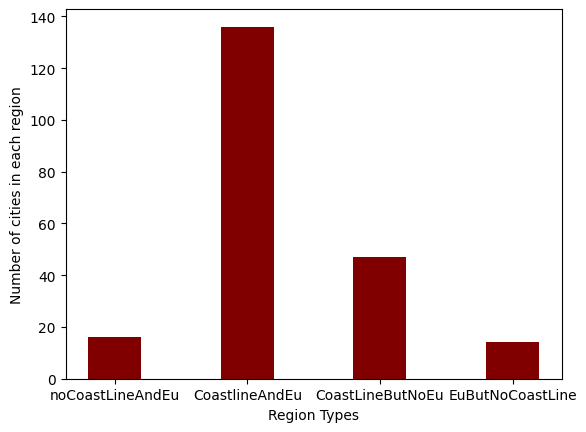

In [13]:
#Visualization
#Part 1.4

regionFrequency = {
    'noCoastLineAndEu' : 0,
    'CoastlineAndEu': 0,
    'CoastLineButNoEu': 0,
    'EuButNoCoastLine' : 0
}


for ind in df.index:
    if df['coastline'][ind] == 'yes' and df['EU'][ind] == 'yes':
        regionFrequency['CoastlineAndEu'] += 1
    elif df['coastline'][ind] == 'no' and df['EU'][ind] == 'no':
        regionFrequency['noCoastLineAndEu'] += 1
    elif df['coastline'][ind] == 'yes':
        regionFrequency['CoastLineButNoEu'] += 1
    else:
        regionFrequency['EuButNoCoastLine'] += 1


regionTypes = list(regionFrequency.keys())
frequencies = list(regionFrequency.values())
plt.bar(regionTypes, frequencies, color = 'maroon', width = 0.4)
plt.xlabel('Region Types')
plt.ylabel('Number of cities in each region')

plt.show()


### Visualization 1.2

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

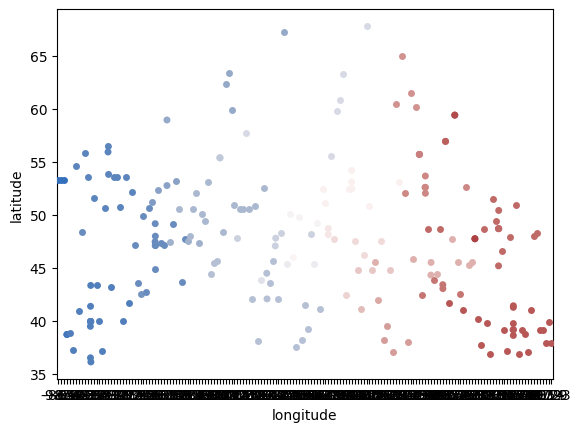

In [14]:
#Visualization
#Part 1.2

sns.stripplot(
    data = df,
    x = "longitude",
    y = "latitude",
    hue = "country",
    palette = 'vlag',
    legend = False,
    native_scale=False
)



### Visualization 1.3

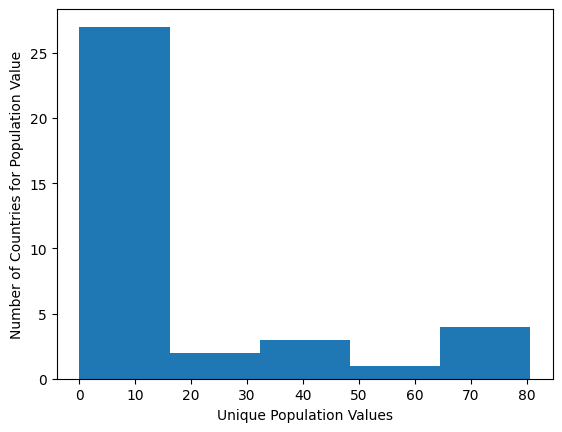

In [15]:
plt.hist(df['population'].unique(), bins= 5)
plt.xlabel('Unique Population Values')
plt.ylabel('Number of Countries for Population Value')
plt.show()

### Visualization 1.4

range(0, 135)


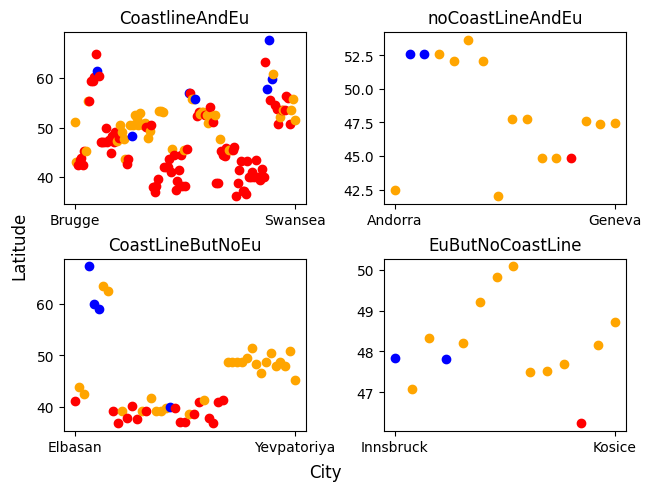

In [16]:
# Visualization
# Part 1.4

regionFrequency = {
    'noCoastLineAndEu' : [],
    'CoastlineAndEu': [],
    'CoastLineButNoEu': [],
    'EuButNoCoastLine' : []
}

fig, axs = plt.subplots(2, 2, constrained_layout = True)

fig.supxlabel('City')
fig.supylabel('Latitude')

axs[0,0].set(title='CoastlineAndEu')
axs[0,1].set(title='noCoastLineAndEu')
axs[1,0].set(title='CoastLineButNoEu')
axs[1,1].set(title='EuButNoCoastLine')

for ind in df.index:
    if df['coastline'][ind] == 'yes' and df['EU'][ind] == 'yes':
        regionFrequency['CoastlineAndEu'].append(df['city'][ind])
    elif df['coastline'][ind] == 'no' and df['EU'][ind] == 'no':
        regionFrequency['noCoastLineAndEu'].append(df['city'][ind])
    elif df['coastline'][ind] == 'yes':
        regionFrequency['CoastLineButNoEu'].append(df['city'][ind])
    else:
        regionFrequency['EuButNoCoastLine'].append(df['city'][ind])



for index, row in df.iterrows():
    theCity = row['city']
    theTemp = row['temperature']
    theLat = row['latitude']

    if row['coastline'] == 'yes' and row['EU'] == 'yes':
        if theTemp > 10:
            axs[0][0].scatter(theCity, theLat, c='red')
        elif theTemp < 6:
            axs[0][0].scatter(theCity, theLat, c='blue')
        else:
            axs[0][0].scatter(theCity, theLat, c='orange')
    elif row['coastline'] == 'no' and row['EU'] == 'no':
        if theTemp > 10:
            axs[0][1].scatter(theCity, theLat, c='red')
        elif theTemp < 6:
            axs[0][1].scatter(theCity, theLat, c='blue')
        else:
            axs[0][1].scatter(theCity, theLat, c='orange')
    elif row['coastline'] == 'yes':
        if theTemp > 10:
            axs[1][0].scatter(theCity, theLat, c='red')
        elif theTemp < 6:
            axs[1][0].scatter(theCity, theLat, c='blue')
        else:
            axs[1][0].scatter(theCity, theLat, c='orange')
    else:
        if theTemp > 10:
            axs[1][1].scatter(theCity, theLat, c='red')
        elif theTemp < 6:
            axs[1][1].scatter(theCity, theLat, c='blue')
        else:
            axs[1][1].scatter(theCity, theLat, c='orange')
#axs[0][0].set_xticks([])
axs[0][0].set_xticks([0, len(regionFrequency['CoastlineAndEu'])-1])
axs[0][1].set_xticks([0, len(regionFrequency['noCoastLineAndEu'])-1])
axs[1][0].set_xticks([0, len(regionFrequency['CoastLineButNoEu'])-1])
axs[1][1].set_xticks([0, len(regionFrequency['EuButNoCoastLine'])-1])
print(range(len(regionFrequency['CoastlineAndEu'])-1))

plt.show()